In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from scipy.optimize import minimize
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import pandas as pd
from pandas_profiling import ProfileReport
from tabulate import tabulate
from sklearn.svm import SVC



In [135]:
# y_pred=0
# def logistic_regression_2(df: pd.DataFrame):


    
#     X=df.iloc[:,:-1]
#     y=df.iloc[:,-1]
#     scale=StandardScaler()
#     X=scale.fit_transform(X)
#     X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
    
    
#     def mapFeature(X1, X2, degree):
#         res = np.ones(X1.shape[0])
#         for i in range(1,degree + 1):
#             for j in range(0,i + 1):
#                 res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
    
#         return res
#     poly_df=pd.DataFrame(X_test)
#     # Get the features 
#     X_mapf= poly_df.iloc[:, :2]

#     print("""
#     Which model you have to use :
#     1.Logistic Regression
#     2.SVM
#     """)

#     degree=int(input("choice the model :\n "))


#     if degree==degree:
#         X_poly = mapFeature(X_mapf.iloc[:, 0], X_mapf.iloc[:, 1], degree)
#         # Get the target variable
#         y_poly = y_test
#         # componenet =X_test

#         def sigmoid(z):
#             return 1 / (1 + np.exp(-z))
       
#         def costFunc(theta, X, y):
#             m = y.shape[0]
#             z = X.dot(theta)
#             h = sigmoid(z)
#             global y_pred
#             y_pred=np.where(h>=0.5,1,0)
        
#             term1 = y * np.log(h)
#             term2 = (1- y) * np.log(1 - h)
#             J = -np.sum(term1 + term2, axis = 0) / m
           
#             return J
        

#         # Set initial values for our parameters
#         initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)
        
#         res = minimize(costFunc, initial_theta, args=(X_poly, y_poly))
#         # our optimizated coefficients
#         theta = res.x



#         def plotDecisionBoundary(theta,degree, axes):
#             u = np.linspace(-1.5, 3, 50)
#             v = np.linspace(-1.5, 3, 50)
#             U,V = np.meshgrid(u,v)
#             # convert U, V to vectors for calculating additional features
#             # using vectorized implementation
#             U = np.ravel(U)
#             V = np.ravel(V)
#             Z = np.zeros((len(u) * len(v)))
    
#             X_poly = mapFeature(U, V, degree)
#             Z = X_poly.dot(theta)
    
#             # reshape U, V, Z back to matrix
#             U = U.reshape((len(u), len(v)))
#             V = V.reshape((len(u), len(v)))
#             Z = Z.reshape((len(u), len(v)))
        
    
#             cs = axes.contour(U,V,Z,levels=[0],cmap= "Greys_r")
#             axes.legend(labels=['diabetic','normal',  'Decision Boundary'])

            
            
#             return cs
        
#         poly_df_with_y=poly_df
#         poly_df_with_y['target']=y_test.values

#         pos=poly_df_with_y['target']==1
#         neg=poly_df_with_y['target']==0


#         # Plot Decision boundary
#         fig, axes = plt.subplots(figsize=(12,7));
#         # axes.figure(figsize=(12,7))
#         axes.set_xlabel('Feature 1')
#         axes.set_ylabel('Feature 2')
#         axes.scatter(poly_df.loc[pos, 0], poly_df.loc[pos, 1], color = 'r', marker='x', label='diabetic')
#         axes.scatter(poly_df.loc[neg, 0], poly_df.loc[neg, 1], color = 'g', marker='o', label='normal')
#         axes.legend(title='Legend', loc = 'best' )
#         if degree==1:
#             axes.set_title('linear Decision Boundary for logistic regression ')
#         elif degree==2:
#             axes.set_title('Quadratic Decision Boundary for logistic regression ')   
#         elif degree==3:
#             axes.set_title('cubic Decision Boundary for logistic regression ')
#         else:
#             axes.set_title(f'{degree}th Degree  Decision Boundary for logistic regression ')
#         plotDecisionBoundary(theta, degree, axes)



#     type(pd.DataFrame(confusion_matrix(y_test,y_pred)))
#     print(classification_report(y_test,y_pred))
#     print('Accuracy Score',accuracy_score(y_test,y_pred))


#     return y_pred



In [5]:
df=pd.read_csv('ready_df')

In [3]:
y_pred=0
def logistic_regression_1(df: pd.DataFrame):

    print("""
    Which model you have to use :
    1.Logistic Regression
    2.SVM
    """)


    
    X=df.iloc[:,:-1]
    y=df.iloc[:,-1]
    scale=StandardScaler()
    X=scale.fit_transform(X)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


    

    degree=int(input("choice the model :\n "))
    
    for degree in range(1,5):
        def mapFeature(X1, X2, degree):
            res = np.ones(X1.shape[0])
            for i in range(1,degree + 1):
                for j in range(0,i + 1):
                    res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
        
            return res
        poly_df=pd.DataFrame(X_test)
        # Get the features 
        X_mapf= poly_df.iloc[:, :2]




        if degree==degree:
            X_poly = mapFeature(X_mapf.iloc[:, 0], X_mapf.iloc[:, 1], degree)
            # Get the target variable
            y_poly = y_test
            # componenet =X_test

            def sigmoid(z):
                return 1 / (1 + np.exp(-z))
        
            def costFunc(theta, X, y):
                m = y.shape[0]
                z = X.dot(theta)
                h = sigmoid(z)
                global y_pred
                y_pred=np.where(h>=0.5,1,0)
            
                term1 = y * np.log(h)
                term2 = (1- y) * np.log(1 - h)
                J = -np.sum(term1 + term2, axis = 0) / m
            
                return J
            

            # Set initial values for our parameters
            initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)
            
            res = minimize(costFunc, initial_theta, args=(X_poly, y_poly))
            # our optimizated coefficients
            theta = res.x



            def plotDecisionBoundary(theta,degree, axes):
                u = np.linspace(-1.5, 3, 50)
                v = np.linspace(-1.5, 3, 50)
                U,V = np.meshgrid(u,v)
                # convert U, V to vectors for calculating additional features
                # using vectorized implementation
                U = np.ravel(U)
                V = np.ravel(V)
                Z = np.zeros((len(u) * len(v)))
        
                X_poly = mapFeature(U, V, degree)
                Z = X_poly.dot(theta)
        
                # reshape U, V, Z back to matrix
                U = U.reshape((len(u), len(v)))
                V = V.reshape((len(u), len(v)))
                Z = Z.reshape((len(u), len(v)))
            
        
                cs = axes.contour(U,V,Z,levels=[0],cmap= "Greys_r")
                axes.legend(labels=['diabetic','normal',  'Decision Boundary'])

                
                
                return cs
            
            poly_df_with_y=poly_df
            poly_df_with_y['target']=y_test.values

            pos=poly_df_with_y['target']==1
            neg=poly_df_with_y['target']==0


            # Plot Decision boundary
            fig, axes = plt.subplots(figsize=(12,7));
            # axes.figure(figsize=(12,7))
            axes.set_xlabel('Feature 1')
            axes.set_ylabel('Feature 2')
            axes.scatter(poly_df.loc[pos, 0], poly_df.loc[pos, 1], color = 'r', marker='x', label='diabetic')
            axes.scatter(poly_df.loc[neg, 0], poly_df.loc[neg, 1], color = 'g', marker='o', label='normal')
            axes.legend(title='Legend', loc = 'best' )
            if degree==1:
                axes.set_title('linear Decision Boundary for logistic regression ')
                text = '\033[1m\033[34mlinear Decision Boundary Report\033[0m'

            elif degree==2:
                axes.set_title('Quadratic Decision Boundary for logistic regression ')   
                text='\033[1m\033[34mQuadratic Decision Boundary Report\033[0m'
            elif degree==3:
                axes.set_title('cubic Decision Boundary for logistic regression ')
                text='\033[1m\033[34mcubic Decision Boundary Report\033[0m'
            else:
                axes.set_title(f'{degree}th Degree  Decision Boundary for logistic regression ')
                text=f'\033[1m\033[34m{degree}th Degree Decision Boundary Report\033[0m'
            plotDecisionBoundary(theta, degree, axes)


        # Calculate accuracy score
        accuracy = accuracy_score(y_test, y_pred)

        # Generate classification report
        report = classification_report(y_test, y_pred)

        # Create table headers and data
        headers = ["Class", "Precision", "Recall", "F1-Score", "Support"]
        rows = []
        for line in report.split("\n")[2:-5]:
            class_info = line.split()
            class_name = class_info[0]
            precision, recall, f1_score, support = class_info[1:]
            rows.append([class_name, precision, recall, f1_score, support])
        rows.append(["Accuracy Score", "", "", "", accuracy])

        # Print table using tabulate
        print(text)
        print(tabulate(rows, headers=headers, tablefmt="fancy_grid"))
     


   


In [6]:
y_pred=0
def logistic_regression(df: pd.DataFrame):

    


    
    X=df.iloc[:,:-1]
    y=df.iloc[:,-1]
    scale=StandardScaler()
    X=scale.fit_transform(X)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

    print("""
    Which model you have to use :
    1.Logistic Regression
    2.For high Degree of logistic Regression
    3.Support Vector Machine
    """)
    

    degree=int(input("choice the model :\n "))

    if degree==1:
        global y_pred
        y_pred=None
        for degree in range(1,5):
            def mapFeature(X1, X2, degree):
                res = np.ones(X1.shape[0])
                for i in range(1,degree + 1):
                    for j in range(0,i + 1):
                        res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
            
                return res
            poly_df=pd.DataFrame(X_test)
            # Get the features 
            X_mapf= poly_df.iloc[:, :2]




            if degree==degree:
                X_poly = mapFeature(X_mapf.iloc[:, 0], X_mapf.iloc[:, 1], degree)
                # Get the target variable
                y_poly = y_test
                # componenet =X_test

                def sigmoid(z):
                    return 1 / (1 + np.exp(-z))
            
                def costFunc(theta, X, y):
                    m = y.shape[0]
                    z = X.dot(theta)
                    h = sigmoid(z)
                    global y_pred
                    y_pred=np.where(h>=0.5,1,0)
                
                    term1 = y * np.log(h)
                    term2 = (1- y) * np.log(1 - h)
                    J = -np.sum(term1 + term2, axis = 0) / m
                
                    return J
                

                # Set initial values for our parameters
                initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)
                
                res = minimize(costFunc, initial_theta, args=(X_poly, y_poly))
                # our optimizated coefficients
                theta = res.x


                def plotDecisionBoundary(theta,degree, axes):
                    u = np.linspace(-1.5, 3, 50)
                    v = np.linspace(-1.5, 3, 50)
                    U,V = np.meshgrid(u,v)
                    # convert U, V to vectors for calculating additional features
                    # using vectorized implementation
                    U = np.ravel(U)
                    V = np.ravel(V)
                    Z = np.zeros((len(u) * len(v)))

                    X_poly = mapFeature(U, V, degree)
                    Z = X_poly.dot(theta)

                    # reshape U, V, Z back to matrix
                    U = U.reshape((len(u), len(v)))
                    V = V.reshape((len(u), len(v)))
                    Z = Z.reshape((len(u), len(v)))
                    cs = axes.contour(U,V,Z,levels=[0],cmap= "Greys_r")
                    axes.legend(labels=['diabetic','normal',  'Decision Boundary'])        
                    
                    return cs

                
                poly_df_with_y=poly_df
                poly_df_with_y['target']=y_test.values

                pos=poly_df_with_y['target']==1
                neg=poly_df_with_y['target']==0


                # Plot Decision boundary
                fig, axes = plt.subplots(figsize=(12,7));
                # axes.figure(figsize=(12,7))
                axes.set_xlabel('Feature 1')
                axes.set_ylabel('Feature 2')
                axes.scatter(poly_df.loc[pos, 0], poly_df.loc[pos, 1], color = 'r', marker='x', label='diabetic')
                axes.scatter(poly_df.loc[neg, 0], poly_df.loc[neg, 1], color = 'g', marker='o', label='normal')
                axes.legend(title='Legend', loc = 'best' )
                if degree==1:
                    axes.set_title('linear Decision Boundary for logistic regression ')
                    text = '\033[1m\033[34mlinear Decision Boundary Report\033[0m'

                elif degree==2:
                    axes.set_title('Quadratic Decision Boundary for logistic regression ')   
                    text='\033[1m\033[34mQuadratic Decision Boundary Report\033[0m'
                elif degree==3:
                    axes.set_title('cubic Decision Boundary for logistic regression ')
                    text='\033[1m\033[34mcubic Decision Boundary Report\033[0m'
                else:
                    axes.set_title(f'{degree}th Degree  Decision Boundary for logistic regression ')
                    text=f'\033[1m\033[34m{degree}th Degree Decision Boundary Report\033[0m'
                plotDecisionBoundary(theta, degree, axes)


            # Calculate accuracy score
            
            accuracy = accuracy_score(y_test, y_pred)

            # Generate classification report
            report = classification_report(y_test, y_pred)

            # Create table headers and data
            headers = ["Class", "Precision", "Recall", "F1-Score", "Support"]
            rows = []
            for line in report.split("\n")[2:-5]:
                class_info = line.split()
                class_name = class_info[0]
                precision, recall, f1_score, support = class_info[1:]
                rows.append([class_name, precision, recall, f1_score, support])
            rows.append(["Accuracy Score", "", "", "", accuracy])

            # Print table using tabulate
            print(text)
            print(tabulate(rows, headers=headers, tablefmt="fancy_grid"))

    elif degree==2:
   

        degree=int(input("How much degree curve you want \n: "))
        # global y_pred
        # y_pred=None
       
        def mapFeature(X1, X2, degree):
            res = np.ones(X1.shape[0])
            for i in range(1,degree + 1):
                for j in range(0,i + 1):
                    res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
        
            return res
        poly_df=pd.DataFrame(X_test)
        # Get the features 
        X_mapf= poly_df.iloc[:, :2]




        
        X_poly = mapFeature(X_mapf.iloc[:, 0], X_mapf.iloc[:, 1], degree)
        # Get the target variable
        y_poly = y_test
        # componenet =X_test

        def sigmoid(z):
            return 1 / (1 + np.exp(-z))
    
        def costFunc(theta, X, y):
            m = y.shape[0]
            z = X.dot(theta)
            h = sigmoid(z)
            global y_pred
            y_pred=np.where(h>=0.5,1,0)
        
            term1 = y * np.log(h)
            term2 = (1- y) * np.log(1 - h)
            J = -np.sum(term1 + term2, axis = 0) / m
        
            return J
        

        # Set initial values for our parameters
        initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)
        
        res = minimize(costFunc, initial_theta, args=(X_poly, y_poly))
        # our optimizated coefficients
        theta = res.x


        def plotDecisionBoundary(theta,degree, axes):
            u = np.linspace(-1.5, 3, 50)
            v = np.linspace(-1.5, 3, 50)
            U,V = np.meshgrid(u,v)
            # convert U, V to vectors for calculating additional features
            # using vectorized implementation
            U = np.ravel(U)
            V = np.ravel(V)
            Z = np.zeros((len(u) * len(v)))

            X_poly = mapFeature(U, V, degree)
            Z = X_poly.dot(theta)

            # reshape U, V, Z back to matrix
            U = U.reshape((len(u), len(v)))
            V = V.reshape((len(u), len(v)))
            Z = Z.reshape((len(u), len(v)))
            cs = axes.contour(U,V,Z,levels=[0],cmap= "Greys_r")
            axes.legend(labels=['diabetic','normal',  'Decision Boundary'])  
            # axes.set_title('linear Decision Boundary for logistic regression ')
            # text = '\033[1m\033[34mMulti Decision Boundary Report\033[0m'      
            
            return cs

            
        poly_df_with_y=poly_df
        poly_df_with_y['target']=y_test.values

        pos=poly_df_with_y['target']==1
        neg=poly_df_with_y['target']==0


        # Plot Decision boundary
        fig, axes = plt.subplots(figsize=(12,7));
        # axes.figure(figsize=(12,7))
        axes.set_xlabel('Feature 1')
        axes.set_ylabel('Feature 2')
        axes.set_title(f'{degree}th Degree  Decision Boundary for logistic regression ')
        axes.scatter(poly_df.loc[pos, 0], poly_df.loc[pos, 1], color = 'r', marker='x', label='diabetic')
        axes.scatter(poly_df.loc[neg, 0], poly_df.loc[neg, 1], color = 'g', marker='o', label='normal')
        axes.legend(title='Legend', loc = 'best' )   
        plotDecisionBoundary(theta, degree, axes)    

        # Calculate accuracy score
            
        accuracy = accuracy_score(y_test, y_pred)

        # Generate classification report
        report = classification_report(y_test, y_pred)

        # Create table headers and data
        headers = ["Class", "Precision", "Recall", "F1-Score", "Support"]
        rows = []
        for line in report.split("\n")[2:-5]:
            class_info = line.split()
            class_name = class_info[0]
            precision, recall, f1_score, support = class_info[1:]
            rows.append([class_name, precision, recall, f1_score, support])
        rows.append(["Accuracy Score", "", "", "", accuracy])

        # Print table using tabulate
        print('\033[1m\033[34mMulti Decision Boundary Report\033[0m' )
        print(tabulate(rows, headers=headers, tablefmt="fancy_grid")) 

    else:

        def mapFeature(X1, X2, degree):
                res = np.ones(X1.shape[0])
                for i in range(1,degree + 1):
                    for j in range(0,i + 1):
                        res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
            
                return res
            

        def plotDecisionBoundary(theta,degree, axes):
            u = np.linspace(-1.5, 3, 50)
            v = np.linspace(-1.5, 3, 50)
            U,V = np.meshgrid(u,v)
            # convert U, V to vectors for calculating additional features
            # using vectorized implementation
            U = np.ravel(U)
            V = np.ravel(V)
            Z = np.zeros((len(u) * len(v)))

            X_poly = mapFeature(U, V, degree)
            Z = X_poly.dot(theta)

            # reshape U, V, Z back to matrix
            U = U.reshape((len(u), len(v)))
            V = V.reshape((len(u), len(v)))
            Z = Z.reshape((len(u), len(v)))
            cs = axes.contour(U,V,Z,levels=[0],cmap= "Greys_r")
            axes.legend(labels=['diabetic','normal',  'Decision Boundary'])    
            plt.show()
            
            return cs
        
        model = SVC(kernel = 'linear')
        model.fit(X_train, y_train)
        
        y_pred=model.predict(X_test)


        theta = np.concatenate((model.intercept_, model.coef_.flatten()))
        df_test=pd.DataFrame(X_test)
        df_test['target']=np.where(y_test==0,0,1)
        pos=df_test.target==1
        neg=df_test.target==0


        # Plot Decision boundary
        fig, axes = plt.subplots(figsize=(12,7));
        # axes.figure(figsize=(12,7))
        axes.set_xlabel('Feature 1')
        axes.set_ylabel('Feature 2')
        axes.set_title('Linear Decision Boundary for SVM  ')   
        text = '\033[1mSVM Decision Boundary Report\033[0m'

        axes.scatter(df_test.loc[pos, 0], df_test.loc[pos, 1], color = 'r', marker='x', label='diabetic')
        axes.scatter(df_test.loc[neg, 0], df_test.loc[neg, 1], color = 'g', marker='o', label='normal')
        axes.legend(title='Legend', loc = 'best' )
        # plotDecisionBoundary(theta,1,axes)


        accuracy = accuracy_score(y_test, y_pred)

        # Generate classification report
        report = classification_report(y_test, y_pred)
    

        # Create table headers and data
        headers = ["Class", "Precision", "Recall", "F1-Score", "Support"]
        rows = []
        for line in report.split("\n")[2:-5]:
            class_info = line.split()
            class_name = class_info[0]
            precision, recall, f1_score, support = class_info[1:]
            rows.append([class_name, precision, recall, f1_score, support])
        rows.append(["Accuracy Score", "", "", "", accuracy])

        # Print table using tabulate
        print(text)
        print(tabulate(rows, headers=headers, tablefmt="fancy_grid"))

        plotDecisionBoundary(theta,1,axes)

        # for poly SVC
        model = SVC(kernel='poly', degree=3,C=1)
        model.fit(X_train, y_train)
        y_pred=model.predict(X_test)

        def plot_decision_boundary(model, X, y):
            h = 0.02  # Step size in the mesh
            x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
            y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

            # Predict the class labels for all points in the mesh grid
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

            # Reshape the predicted labels to match the mesh grid shape
            Z = Z.reshape(xx.shape)

            # Plot the decision boundary and the data points
            fig, axes = plt.subplots(figsize=(12,7));
            # axes.figure(figsize=(12,7))
            axes.set_xlabel('Feature 1')
            axes.set_ylabel('Feature 2')
            axes.set_title('Poly Decision Boundary for SVM  ')   
            text='\033[1m\033[SVM Decision Boundary Report\033[0m'
            plt.contour(xx, yy, Z, alpha=0.8,colors='black')
            axes.scatter(df_test.loc[pos, 0], df_test.loc[pos, 1], color = 'r', marker='x', label='diabetic')
            axes.scatter(df_test.loc[neg, 0], df_test.loc[neg, 1], color = 'g', marker='o', label='normal')
            axes.legend(title='Legend', loc = 'best' )
            
        plot_decision_boundary(model, X_test, y_test)

        accuracy = accuracy_score(y_test, y_pred)

        # Generate classification report
        report = classification_report(y_test, y_pred)
    

        # Create table headers and data
        headers = ["Class", "Precision", "Recall", "F1-Score", "Support"]
        rows = []
        for line in report.split("\n")[2:-5]:
            class_info = line.split()
            class_name = class_info[0]
            precision, recall, f1_score, support = class_info[1:]
            rows.append([class_name, precision, recall, f1_score, support])
        rows.append(["Accuracy Score", "", "", "", accuracy])

        # Print table using tabulate
        print(text)
        print(tabulate(rows, headers=headers, tablefmt="fancy_grid"))

        
        




   



    Which model you have to use :
    1.Logistic Regression
    2.For high Degree of logistic Regression
    3.Support Vector Machine
    
SVM Decision Boundary Report
╒════════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Class          │ Precision   │ Recall   │ F1-Score   │   Support │
╞════════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0              │ 0.76        │ 0.85     │ 0.81       │     95    │
├────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1              │ 0.68        │ 0.55     │ 0.61       │     55    │
├────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Accuracy Score │             │          │            │      0.74 │
╘════════════════╧═════════════╧══════════╧════════════╧═══════════╛


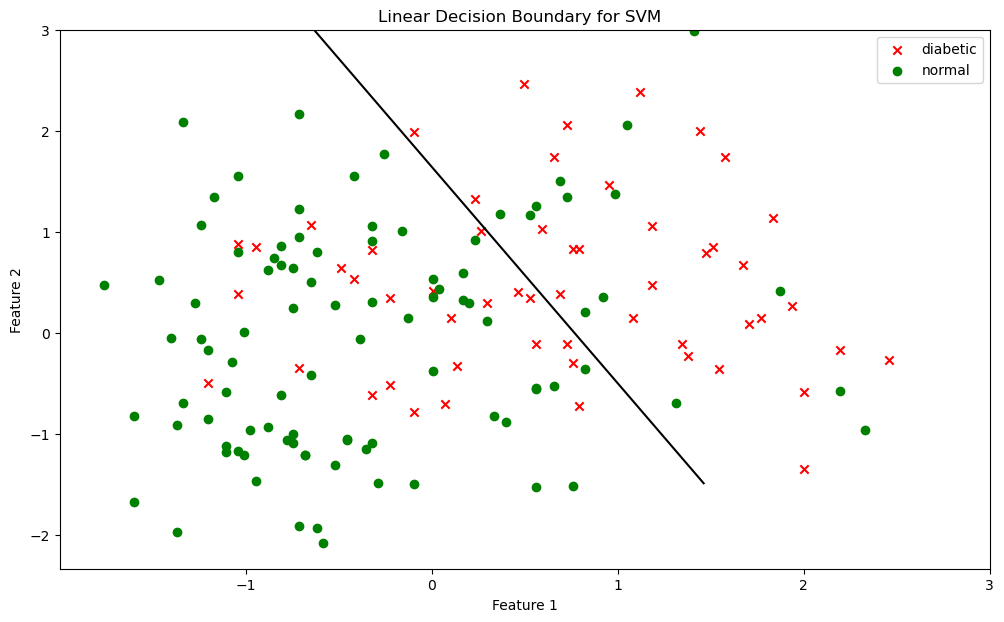

SVM Decision Boundary Report
╒════════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Class          │ Precision   │ Recall   │ F1-Score   │   Support │
╞════════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0              │ 0.71        │ 0.95     │ 0.81       │ 95        │
├────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1              │ 0.79        │ 0.35     │ 0.48       │ 55        │
├────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Accuracy Score │             │          │            │  0.726667 │
╘════════════════╧═════════════╧══════════╧════════════╧═══════════╛


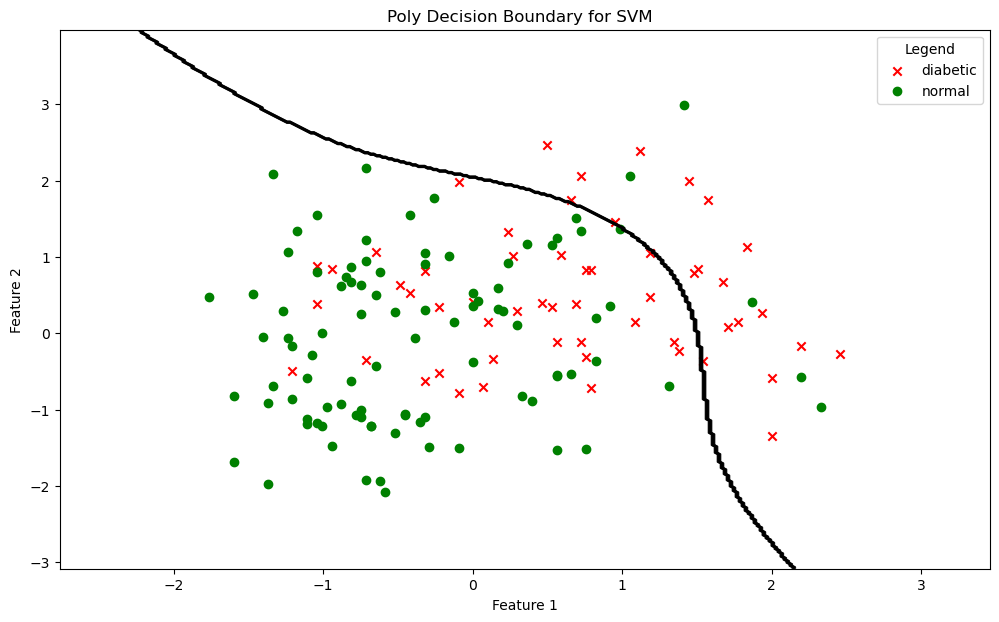

In [7]:
logistic_regression(df)

In [18]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
scale=StandardScaler()
X=scale.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [45]:
model = SVC(kernel='poly', degree=6,C=0.4)
model.fit(X_train, y_train)


SVC(C=0.4, degree=6)

In [62]:
def plot_decision_boundary(model, X, y):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the class labels for all points in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape the predicted labels to match the mesh grid shape
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the data points
    plt.contour(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()


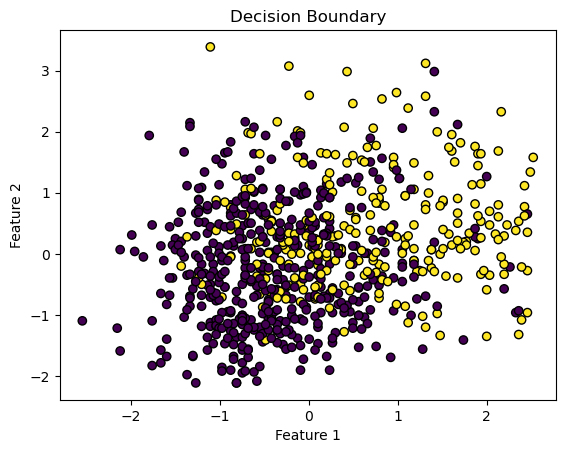

In [63]:
plot_decision_boundary(model, X, y)

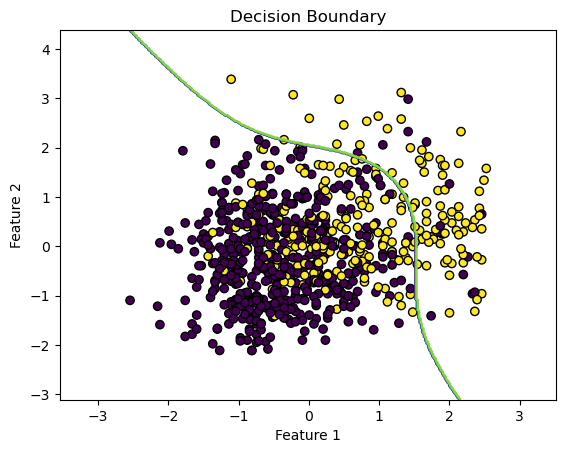

In [41]:
def plot_decision_boundary(model, X, y):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the class labels for all points in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape the predicted labels to match the mesh grid shape
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the data points
    fig, axes = plt.subplots(figsize=(12,7));
    # axes.figure(figsize=(12,7))
    axes.set_xlabel('Feature 1')
    axes.set_ylabel('Feature 2')
    axes.set_title('Linear Decision Boundary for SVM  ')   
    text='\033[1m\033[SVM Decision Boundary Report\033[0m'
    axes.scatter(df_test.loc[pos, 0], df_test.loc[pos, 1], color = 'r', marker='x', label='diabetic')
    axes.scatter(df_test.loc[neg, 0], df_test.loc[neg, 1], color = 'g', marker='o', label='normal')
    axes.legend(title='Legend', loc = 'best' )
